In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

data = yf.download('^NSEI', start='2021-01-01', end='2024-09-05')

[*********************100%***********************]  1 of 1 completed


# Preprocess

In [9]:
# Use 'Close' prices
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Set the time step (e.g., use 60 days of historical data to predict the next day)
time_step = 60

# Create a function to convert the dataset into sequences
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size

train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create the training and testing data
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data for the LSTM layer
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# Build neural network

In [10]:
# Build the LSTM model
model = Sequential()

# Add the first LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))

# Add a second LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the dense layers
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer predicting the next price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=50)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0396
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0069
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.0041
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0032
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0027
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0022
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0020
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0019
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0019
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0018
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0018
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0017
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0016
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0016
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0015
Epoch 16/50


# Testing

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step


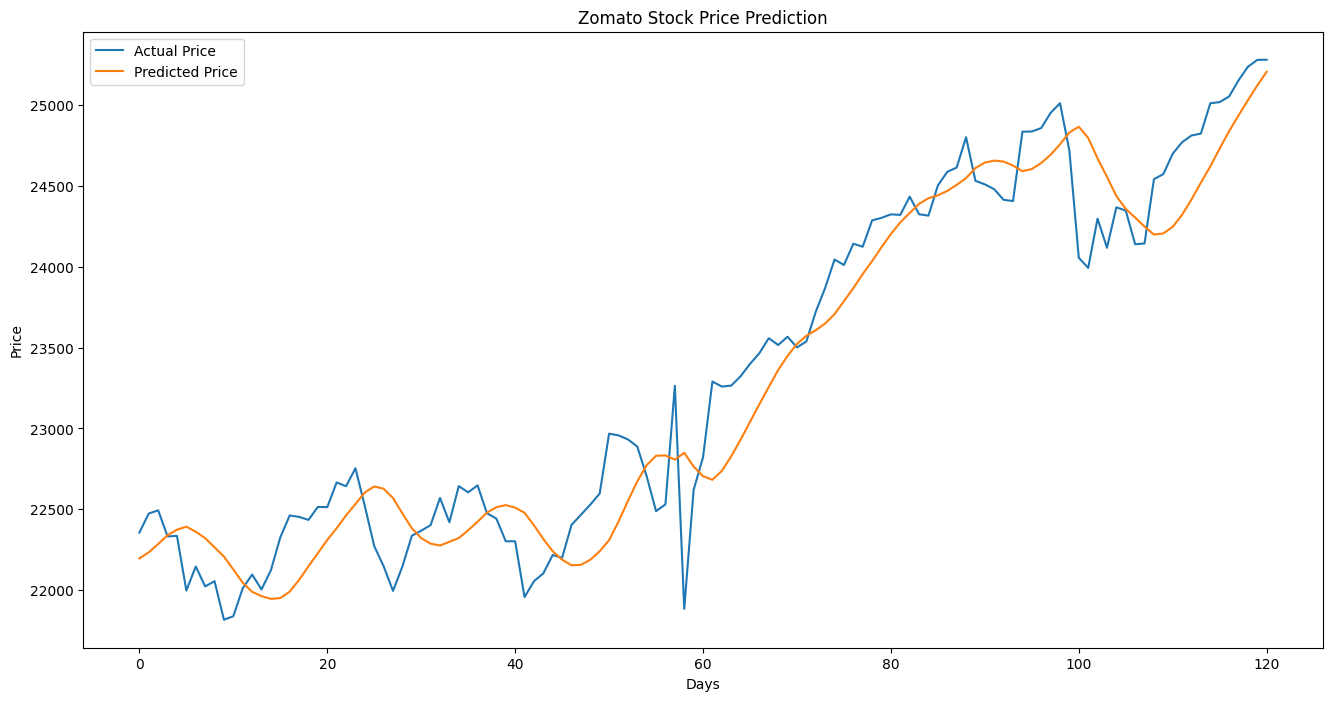

In [11]:
# Predict on the test data
predictions = model.predict(X_test)

# Inverse transform to get actual prices
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Zomato Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# Future 60 days price

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

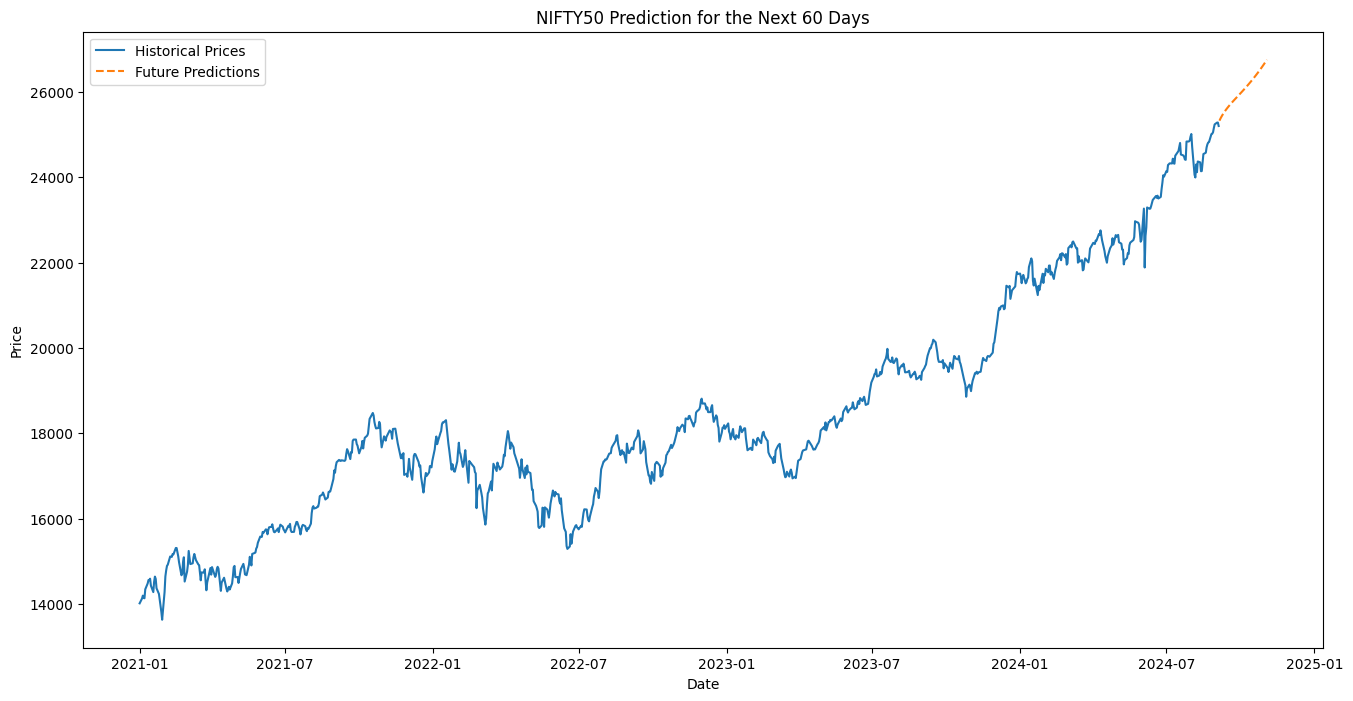

In [13]:
# Predict future prices
recent_data = scaled_data[-time_step:]
recent_data = recent_data.reshape((1, time_step, 1))

future_days = 60
future_predictions = []

for _ in range(future_days):
    # Predict the next day's price
    future_price = model.predict(recent_data)[0, 0]
    future_predictions.append(future_price)

    # Update the input sequence to include the newly predicted value
    future_price_reshaped = np.array([[future_price]]).reshape((1, 1, 1))
    recent_data = np.append(recent_data[:, 1:, :], future_price_reshaped, axis=1)

# Convert future predictions back to original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Create future dates
last_date = data.index[-1]
future_dates = [last_date + pd.DateOffset(days=i) for i in range(1, future_days + 1)]

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Close'], label='Historical Prices')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('NIFTY50 Prediction for the Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
